# Text Analysis with SpaCy and Scikit-Learn

We will introduce some features of the spaCy libary. It is "industrial strength natural language processing for Python". It implements state of the art methods, is opinionated and focusses on being fast.

We also throw in some simple machine-learning on top.

The goal of this session is to show you a production ready tool, introduce some concepts, and get everyone warmed up. We will look at how some of these methods really work later on by implementing them from scratch. As with most things you can get 80% of the way there with a tutorial quality implementation but to do it really well (production level!) you need to spend a lot of time tweaking and implementing little twists. This is when you should reach for a tool like spacy. As they have done all that hard work for you already.

In [1]:
from IPython.display import IFrame

IFrame("https://spacy.io", width="100%", height=500)

## Installing things

My recommendation is to use the `conda` package manager on all operating systems that support it (OSX, Windows, Linux). It isn't perfect but chances are things will just work. And those that don't work will be hard to get working in any of the systems.

Two best practices:
* create a "conda environment" for *everything* (I have over 100 on this laptop): `conda create -n deep-nlp python` to create on called "deep-nlp"
* use packages from the conda-forge channel. More choice and less lag between a new version of a package being released and package being updated. To use conda-forge: `conda install -c conda-forge <packagename>`

To install the latest version of spacy: `conda install -c conda-forge spacy`. I tested my examples with spacy-2.0.11.

spacy supports many different languages, and each language has several models. The different models per language represent different trade-offs in the "performance" vs "size" space. Let's install the small English model:

In [2]:
##!python -m spacy download en_core_web_sm

In [3]:
import spacy

In [4]:
nlp = spacy.load('en_core_web_sm')

In [5]:
spacy.__version__

'2.0.11'

We will use [Monty Python and the Holy Grail](https://en.wikipedia.org/wiki/Monty_Python_and_the_Holy_Grail) as a text to play with. You can find it in the `data/` directory at the top level of this repository.

In [6]:
grail_raw = open('../data/grail.txt').read()
pride_raw = open('../data/pride.txt').read()

In [7]:
%%time
# Parse the texts. These commands might take a little while. 
grail = nlp(grail_raw)

CPU times: user 7.87 s, sys: 2.8 s, total: 10.7 s
Wall time: 4.34 s


In [8]:
%%time
# Running on Pride and Prejudice takes ~9GB of RAM on my machine
# maybe avoid running it if your machine doesn't have a lot of
# memory
pride = nlp(pride_raw)

CPU times: user 1min 2s, sys: 57.4 s, total: 1min 59s
Wall time: 4min 51s


## Exploring the Document

Each SpaCy document is already tokenized into words, which are accessible by iterating over the document:

In [9]:
print(grail[0])

SCENE


In [10]:
grail[:10]

SCENE 1: [wind] [clop clop clop

In [11]:
grail[100:130]

have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord

You can also access each sentence from the `grail.sents` attribute:

In [12]:
next(grail.sents)

SCENE 1

In [13]:
from itertools import islice

for sent in islice(grail.sents, 5):
    print(sent)

SCENE 1
: [wind]
[clop clop clop] 
KING ARTHUR:
Whoa there!  
[clop clop clop] 



This looks a bit weird, but actually spacy is doing an Ok job given how weirdly the manuscript is formatted:

In [14]:
print(grail_raw[:400])

SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop clop clop] 
SOLDIER #1: Halt!  Who goes there?
ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!
SOLDIER #1: Pull the other one!
ARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land


Let's see what it looks like for Pride and Prejudice:

In [15]:
pride[0]

﻿It

In [16]:
next(pride.sents)

﻿It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife.


We can also turn the generator of sentences into a `list` and look at the last sentence:

In [17]:
list(grail.sents)[-1]

Christ!

In [18]:
list(pride.sents)[-1]

Darcy, as well as Elizabeth, really loved them; and they were both ever
sensible of the warmest gratitude towards the persons who, by bringing
her into Derbyshire, had been the means of uniting them.

In [19]:
sentence_lengths = [len(sent) for sent in pride.sents]
sorted(sentence_lengths, reverse=True)[:10]

[218, 192, 152, 141, 137, 135, 134, 127, 125, 121]

In [20]:
for sent in pride.sents:
    if len(sent) == 218:
        print(sent)
        print("-"*80)

Every lingering struggle in his favour grew fainter
and fainter; and in farther justification of Mr. Darcy, she could not
but allow that Mr. Bingley, when questioned by Jane, had long ago
asserted his blamelessness in the affair; that proud and repulsive as
were his manners, she had never, in the whole course of their
acquaintance--an acquaintance which had latterly brought them much
together, and given her a sort of intimacy with his ways--seen anything
that betrayed him to be unprincipled or unjust--anything that spoke him
of irreligious or immoral habits; that among his own connections he was
esteemed and valued--that even Wickham had allowed him merit as a
brother, and that she had often heard him speak so affectionately of his
sister as to prove him capable of _some_ amiable feeling; that had his
actions been what Mr. Wickham represented them, so gross a violation of
everything right could hardly have been concealed from the world; and
that friendship between a person capable of i

## Exploring individual words

Each word has a large number of properties that you can look at. (spacy did more than just tokenise the text when it ran):

In [21]:
[prop for prop in dir(pride[4]) if not prop.startswith('_')]

['ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_extension',
 'has_vector',
 'head',
 'i',
 'idx',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'left_edge',
 'lefts',
 'lemma',
 'lemma_',
 'lex_id',
 'like_email',
 'like_num',
 'like_url',
 'lower',
 'lower_',
 'n_lefts',
 'n_rights',
 'nbor',
 'norm',
 'norm_',
 'orth',
 'orth_',
 'pos',
 'pos_',
 'prefix',
 'prefix_',
 'prob',
 'rank',
 'right_edge',
 'rights',
 'sent_start',
 'sentiment',
 'set_extension',
 'shape',
 'shape_',
 'similarity',
 'string',
 'subtree',
 'suffix',
 'suffix_',
 'tag',
 'tag_',
 'text',
 'text_with_ws',
 'vector',
 'vector_norm',
 'vocab',
 'whitespace_'

In [22]:
# for example the .i attribute tells you the index of the word in the document
pride[4].i

4

We can look at where in the story each character gets mentioned and plot that. In NLP this is called a dispersion plot.

In [23]:
# Here character means a person in the story not a character
# in a string.
def locations(character, document):
    """ 
    Make a list of locations where `character`
    is mentioned, bin those into a histogram, 
    and convert it into a Pandas Series object to make
    plotting a bunch of these easier.
    """
    locations = []
    for word in document:
        if word.lower_ == character:
            locations.append(word.i)
            
    return pd.Series(np.histogram(locations, bins=50)[0])

In [24]:
import pandas as pd
import numpy as np


df = pd.DataFrame(
    {name: locations(name.lower(), pride) 
     for name in ['Elizabeth', 'Darcy', 'Jane', 'Bennet']}
)
df.head(10)

,Elizabeth,Darcy,Jane,Bennet
0,5,14,3,20
1,6,8,7,13
2,10,9,9,2
3,18,11,16,14
4,15,14,4,10
5,13,20,5,8
6,21,10,3,8
7,6,0,9,9
8,7,6,4,23
9,12,18,2,5


In [25]:
%matplotlib inline
# Turn on inline plotting, only needed once

# Set some "presentation" friendly defaults
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

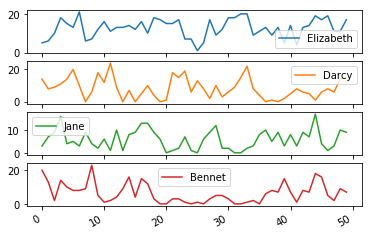

In [26]:
df.plot(subplots=True);

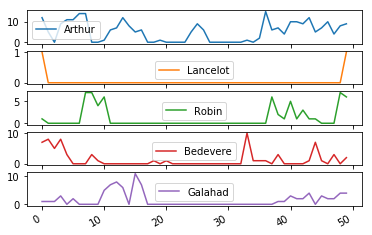

In [27]:
pd.DataFrame(
    {name: locations(name.lower(), grail) 
     for name in ['Arthur', 'Lancelot', 'Robin', 'Bedevere', 'Galahad']}
).plot(subplots=True);

I've not watched the Holy Grail in a while, but apparently Lancelot doesn't feature an awful lot.

## Exploring Named Entities

What kind of named entities does spacy know to recognise?

In [28]:
set(ent.label_ for ent in grail.ents)

{'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART'}

In [29]:
# What works fo art are mentioned in the grail?
[ent for ent in grail.ents if ent.label_ == 'WORK_OF_ART']

[The Tale of Sir,
 The Tale of Sir Galahad,
 Knights of Ni,
 The Tale of Sir Launcelot,
 Knights of Ni,
 Black Beast of Aaauugh eats BROTHER MAYNARD] ,
 The Bridge of Death]

In [30]:
# What groups of people are mentioned in the grail?
set(ent.string.strip().capitalize() for ent in grail.ents if ent.label_ == 'NORP')

{'', 'African', 'European', 'French', 'I.', 'Thpppppt', 'U-- u--'}

In [31]:
# This is about the French people not French the language
french_people = []
for ent in grail.ents:
    if ent.label_ == 'NORP' and ent.string.strip() == 'French':
        french_people.append(ent)

for entity in french_people:
    print(entity.sent)
    print('-'*80)

I'm French!  
--------------------------------------------------------------------------------
The ferocity of the French taunting took him completely by surprise, and Arthur became convinced that a new strategy was required if the quest for the Holy Grail were to be brought to a successful conclusion.  
--------------------------------------------------------------------------------
So, we French fellows outwit
--------------------------------------------------------------------------------
So, you think you could out-clever us French folk with your silly knees-bent running about advancing behaviour?!  
--------------------------------------------------------------------------------
[exciting music] [music stops] [silence] French persons!
FRENCH GUARDS: [taunting] ...
--------------------------------------------------------------------------------


In [32]:
# what organisations appear in the Grail?
set(ent.string.strip() for ent in grail.ents if ent.label_ == 'ORG')

{'',
 'ANIMATOR',
 'ARMY OF',
 'ARTHUR',
 'ARTHUR and BEDEVERE',
 'ARTHUR and BLACK KNIGHT',
 'ARTHUR and PARTY',
 'ARTHUR:',
 'ARTHUR: Charge',
 'ARTHUR: Ohh',
 'ARTHUR: Shut',
 'ARTHUR: Stand',
 'Aaaaugh\nNARRATOR',
 'Aaagh',
 'Aaah',
 'Ahh',
 'Arthur',
 'B-- b--',
 'B-- but--',
 'BRIDE',
 'Britons',
 'Build',
 'CART',
 'CARTOON CHARACTER',
 'Castle',
 'Chop',
 'Come',
 'DINGO',
 'ENCHANTER',
 'Excalibur',
 'FRENCH GUARD',
 'Far',
 'GALAHAD',
 'GUEST',
 'Guy de Loimbard',
 'HERBERT',
 'Holy Grail',
 'INSPECTOR',
 'Idiom',
 'KNIGHTS',
 'KNIGHTS OF',
 'KNIGHTS OF NI',
 'KNIGHTS: Charge',
 'KNIGHTS: Iiiiives',
 'Knights',
 'Knights of Ni',
 'Knights of the Round Table',
 'LAUNCELOT',
 'Launcelot',
 'Launcelot of Camelot',
 'Launcelot of Camelot--\nLAUNCELOT',
 'MONKS',
 'Mercea',
 'Mother--',
 'NARRATOR',
 'Nador',
 'OLD',
 'Olfin Bedwere of Rheged',
 'Ooh',
 'PATSY',
 'PIGLET',
 'Piglet',
 'Pure',
 'Quick',
 'RANDOM',
 'SIR',
 'STUNNER',
 'SUN',
 'Saxons',
 'Supreme',
 'TIM',
 'The Cas

It might be worth specialising the parser or preprocessing the contents of the Grail to deal with the stage directions and then repeating this. 99% of machine-learning is data cleaning.

In [33]:
# What places (GPE) are mentioned in Pride and Prejudice?
set([ent.lower_ for ent in pride.ents if ent.label_ == 'GPE'])

{'',
 'bingley',
 'birmingham',
 'brighton',
 'cambridge',
 'charlotte',
 'china',
 'collinses',
 'courier',
 'darcy',
 'derbyshire',
 'england',
 'georgiana',
 'great britain',
 'hertfordshire',
 'hunsford',
 'jane',
 'kitty',
 'kympton',
 'lakes',
 'lambton',
 'liverpool',
 'london',
 'london lydia',
 'love’',
 'lydia',
 'maria',
 'meryton',
 'miss bingley',
 'netherfield',
 'newcastle',
 'north',
 'oakham mount',
 'oxford',
 'pratt',
 'rosings',
 'rosings park',
 'scotland',
 'sisters’',
 'st. james’s',
 'vingt',
 'wickham',
 'wilfully',
 'yours'}

## Part of speech tagging

You can also access the tags and part of speech assigned to each word.

Let's try this on the level of a sentence. First, let's get all the sentences in which Sir Robin is explicitly mentioned:

In [34]:
robin_sents = [sent for sent in grail.sents if 'Sir Robin' in sent.string]
robin_sents

[The wise Sir Bedevere was the first to join King Arthur's knights, but other illustrious names were soon to follow: Sir Lancelot the Brave; Sir Gallahad the Pure; and Sir Robin the-not-quite-so-brave-as-Sir-Lancelot, who had nearly fought the Dragon of Angnor, who had nearly stood up to the vicious Chicken of Bristol, and who had personally wet himself at the Battle of Badon Hill; and the aptly named Sir Not-appearing-in-this-film.  ,
 The Tale of Sir Robin.  ,
 Sir Robin rode north, through the dark forest of Ewing, accompanied by his favorite minstrels.,
 Bravely bold Sir Robin, rode forth from Camelot.  ,
 O brave Sir Robin.  ,
 Brave, brave, brave, brave Sir Robin!  ,
 To have his kneecaps split, and his body burned away, And his limbs all hacked and mangled, brave Sir Robin!,
 He is brave Sir Robin, brave Sir Robin, who--
 ROBIN: Shut up!  ,
 Brave Sir Robin ran away.,
 Yes, brave Sir Robin turned about
 ROBIN: I didn't!,
 Bravest of the brave, Sir Robin.,
 My liege, it's Sir Rob

In [35]:
robin = robin_sents[2]
robin

Sir Robin rode north, through the dark forest of Ewing, accompanied by his favorite minstrels.

In [36]:
from spacy import displacy

displacy.render(nlp(robin.string), style='dep', jupyter=True)

You can see that adjectives are typically children of the noun they describe in this tree structure. This means we can find out what adjectives describe an entity by looking at their children and picking out the adjectives:

In [37]:
for sent in grail.sents:
    for word in sent: 
        if 'Robin' in word.string: 
            for child in word.children: 
                if child.pos_ == 'ADJ':
                    print(child)
                    
# Robin is brave, apparently.

brave
brave
brave


In [38]:
# Let's make a short function to find adjectives describing
# characters appearing in a text
from collections import Counter

def adjectives_describing_characters(text, character):
    sents = [sent for sent in text.sents if character in sent.string]
    adjectives = []
    for sent in sents: 
        for word in sent: 
            if character in word.string:
                for child in word.children: 
                    if child.pos_ == 'ADJ': 
                        adjectives.append(child.string.strip())
    return Counter(adjectives).most_common(10)

In [39]:
adjectives_describing_characters(pride, 'Darcy')

[('late', 6), ('superior', 1), ('abominable', 1), ('poor', 1), ('her', 1)]

## Word Embeddings (Word Vectors)

Word embeddings (word vectors) are numeric representations of words, the word vectors used here are generated by learning which words occur together via a neural network. The vectors SpaCy uses are the GloVe vectors, Stanford's Global Vectors for Word Representation. These vectors can be used to calculate semantic similarity between words and documents.

We will learn how to generate our own word vectors later, as well as get some intuition on
how they work. For now we will jsut use them.

In [40]:
coconut = nlp("coconut")
african_swallow = nlp("African Swallow")
european_swallow = nlp("European Swallow")
horse = nlp("horse")

In [41]:
# despite sounding similar, coconuts and horses aren't
coconut.similarity(horse)

0.76193239199532525

In [42]:
african_swallow.similarity(horse)

0.30431249919711251

In [43]:
african_swallow.similarity(european_swallow)

0.93806063738558232

These vectors have 300 dimensions. They are very useful as you can do "arithmetic" on them. We will see that in action later.

To show that the space that the words are embedded in has some semantic meaning lets look at the first 100 nouns in Pride and Prejudice. We can't visualise 300 dimensions in a single plot so instead we will do dimensionality reduction using truncated SVD.

In [44]:
pride_nouns = [word for word in pride if word.pos_.startswith('N')][:100]

pride_noun_vecs = [word.vector for word in pride_nouns]
pride_noun_labels = [word.string.strip() for word in pride_nouns]

In [45]:
from sklearn.decomposition import TruncatedSVD

In [46]:
lsa = TruncatedSVD(n_components=2)
lsa_coords = lsa.fit_transform(pride_noun_vecs)

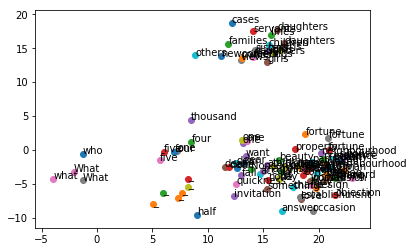

In [47]:
xs, ys = lsa_coords[:,0], lsa_coords[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(pride_noun_labels[i], (xs[i], ys[i]))

## Document similarity

We can use the builtin `similarity` function in spacy to compute the similarity of documents as well as single words. Below we have ten pairs of questions. Let's see if we can see which questions are pairs and which aren't:

In [48]:
question1s = ['Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?',
 'How can I be a good geologist?',
 'How do I read and find my YouTube comments?',
 'What can make Physics easy to learn?',
 'What would a Trump presidency mean for current international master’s students on an F1 visa?',
 'What does manipulation mean?',
 'Why are so many Quora users posting questions that are readily answered on Google?',
 'Why do rockets look white?',
 'How should I prepare for CA final law?']
question2s = ["I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",
 'What should I do to be a great geologist?',
 'How can I see all my Youtube comments?',
 'How can you make physics easy to learn?',
 'How will a Trump presidency affect the students presently in US or planning to study in US?',
 'What does manipulation means?',
 'Why do people ask Quora questions which can be answered easily by Google?',
 'Why are rockets and boosters painted white?',
 'How one should know that he/she completely prepare for CA final exam?']

In [49]:
q1 = nlp(question1s[2])
print("Query:", q1)
print()
for q2 in question2s:
    print("{:.3}: {}".format(q1.similarity(nlp(q2)), q2))

Query: How do I read and find my YouTube comments?

0.48: I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?
0.6: What should I do to be a great geologist?
0.826: How can I see all my Youtube comments?
0.648: How can you make physics easy to learn?
0.388: How will a Trump presidency affect the students presently in US or planning to study in US?
0.352: What does manipulation means?
0.61: Why do people ask Quora questions which can be answered easily by Google?
0.369: Why are rockets and boosters painted white?
0.485: How one should know that he/she completely prepare for CA final exam?
